# Data Science Lab Project

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(".../Database.csv")

# Dictionary to rename columns with more descriptive names (only exact column names)
column_mapping = {
    'qd1': 'Gender',
    'qd2': 'Geographic_Area', 
    'qd3': 'Province',
    'qd4': 'Municipality_Size',
    'qd5': 'Marital_Status',
    'qd6': 'Household_Composition',
    'qd7': 'Age',
    'qd8': 'Professional_Status',
    'qd9': 'Education_Level',
    'qd10': 'Work_Sector',
    'qd11': 'Professional_Role',
    'qd12': 'Contract_Type',
    'qd13': 'Income_Bracket',
    'qd14': 'Purchase_Motivation',
    'qd15': 'Online_Purchase_Frequency',
    'qd16': 'Preferred_Purchase_Channels',
    'qd17': 'Devices_Used',
    'qd18': 'Purchase_Influence_Factors',
    'qd19': 'Review_Importance',
    'qd20': 'Encountered_Problems',
    'qd21': 'Experience_Satisfaction',
    'qd22': 'Improvement_Recommendations'
}

# rename exact columns
df = df.rename(columns=column_mapping)



# convert Age to numeric 
if 'Age' in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# show dataset dimensions
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*50)
print("FIRST 5 ROWS OF THE DATASET:")
print("="*50)
print(df.head())

print("\n" + "="*50)
print("COLUMN INFORMATION:")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS (NUMERIC COLUMNS):")
print("="*50)
print(df.describe())

# check for missing values
print("\n" + "="*50)
print("MISSING VALUES PER COLUMN:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Values': missing_values,
    'Percentage': missing_percentage.round(2)
})
print(missing_df[missing_df['Missing_Values'] > 0])

Dataset Shape: (4862, 219)
Number of rows: 4862
Number of columns: 219

FIRST 5 ROWS OF THE DATASET:
  Gender   Age qd7_a Geographic_Area  \
0   Uomo  68.0   NaN    Nord - Ovest   
1   Uomo  36.0   NaN             Sud   
2  Donna  64.0   NaN             Sud   
3  Donna  50.0   NaN             Sud   
4   Uomo  66.0   NaN             Sud   

                                            Province qd5_1 qd5_2 qd5_3 qd5_4  \
0  Una città con numero di abitanti compreso tra ...    Sì    No    No    No   
1  Un comune con numero di abitanti da 3.000 a ci...    No    No    Sì    No   
2  Una città con numero di abitanti compreso tra ...    No    Sì    No    No   
3  Una città con numero di abitanti compreso tra ...    No    No    No    No   
4  Una città con numero di abitanti compreso tra ...    No    Sì    No    No   

  qd5_5  ...          qd6_2          qd6_3          qd6_4          qd6_5  \
0    No  ...         Spesso   Molto spesso            Mai  Qualche volta   
1    No  ...   Molto spes

In [26]:
# data types count
print(df.dtypes.value_counts())

# missing values top 10 columns
missing = df.isnull().sum().sort_values(ascending=False)
print("Top 10 columns with the most missing values:")
print(missing.head(10))


object     217
float64      2
Name: count, dtype: int64
Top 10 columns with the most missing values:
qd7_a       4643
qp2_17      4594
qp3_17      4594
qf12_4_2    4332
qf12_1_3    4332
qf12_2_2    4332
qf12_3_1    4332
qf12_3_2    4332
qf12_3_3    4332
qf12_3_7    4332
dtype: int64


In [27]:
print(df.describe(include='all')) 

       Gender          Age  qd7_a Geographic_Area  \
count    4862  4643.000000    219            4862   
unique      2          NaN      3               5   
top     Donna          NaN  50-59    Nord - Ovest   
freq     2446          NaN    166            1317   
mean      NaN    50.307991    NaN             NaN   
std       NaN    16.680679    NaN             NaN   
min       NaN    18.000000    NaN             NaN   
25%       NaN    36.000000    NaN             NaN   
50%       NaN    50.000000    NaN             NaN   
75%       NaN    65.000000    NaN             NaN   
max       NaN    79.000000    NaN             NaN   

                                                 Province qd5_1 qd5_2 qd5_3  \
count                                                4862  4862  4862  4862   
unique                                                  5     2     2     2   
top     Una città con numero di abitanti compreso tra ...    No    Sì    No   
freq                                           

## EDA 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

cols_to_plot = {
    "Gender": "Gender",
    "Age": "Age",
    "Geographic_Area": "Geographic Area",
    "Education_Level": "Education Level",
    "Income_Bracket": "Income Bracket"
}

# extract and rename for visualization
# for the visualization we create a new df
df_viz = df[list(cols_to_plot.keys())].rename(columns=cols_to_plot)

# convert age to numeric
df_viz["Age"] = pd.to_numeric(df_viz["Age"], errors="coerce")

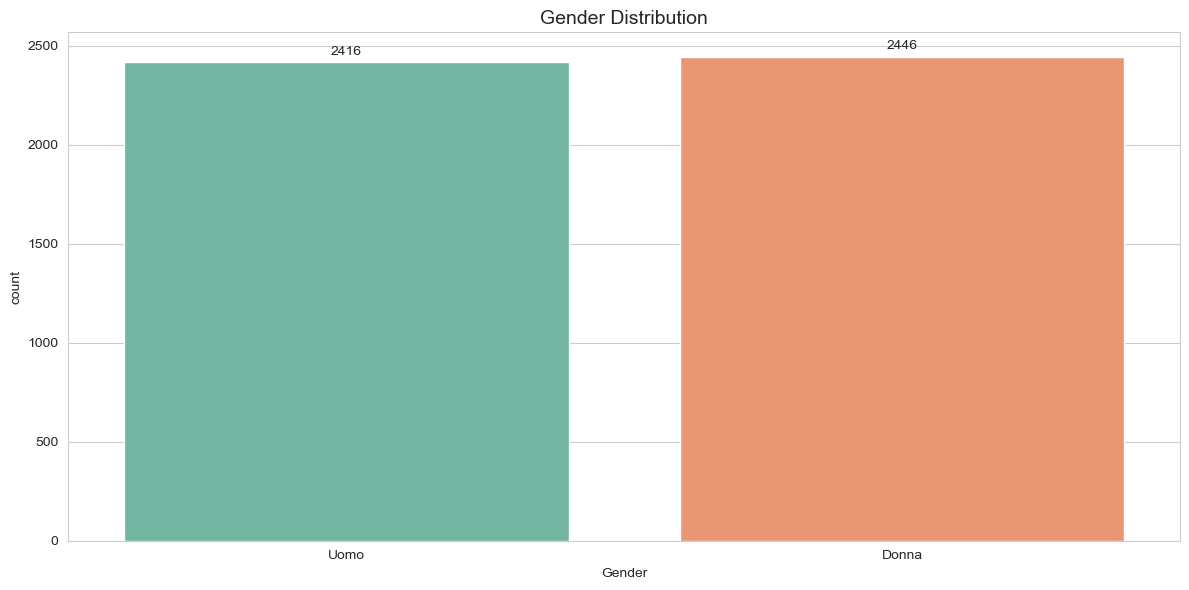

In [29]:
# gender distribution
ax = sns.countplot(data=df_viz, x="Gender", palette="Set2")
plt.title("Gender Distribution", fontsize=14)
plt.xticks(rotation=0)


for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + max(df_viz["Gender"].value_counts()) * 0.01,
            count,
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

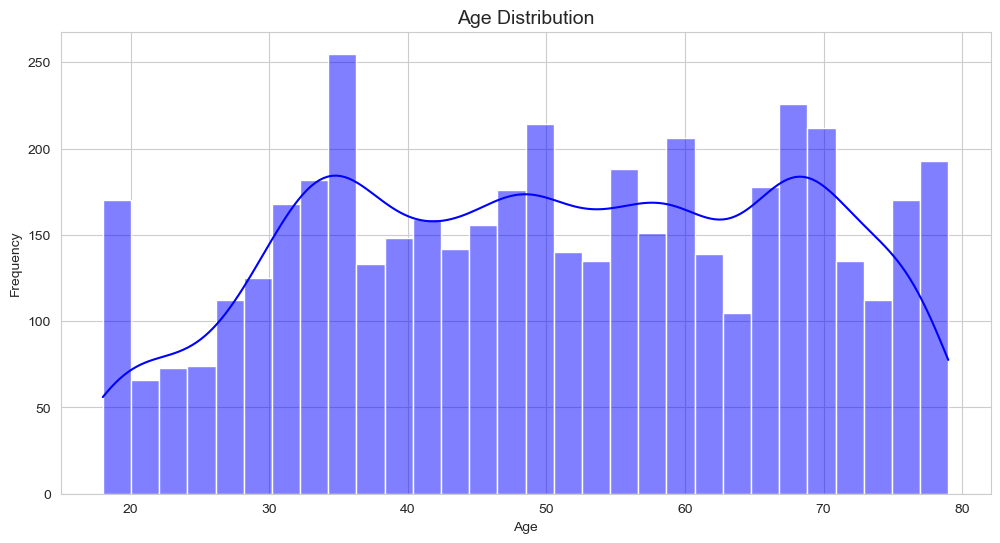

In [30]:
# age distribution
sns.histplot(df_viz["Age"].dropna(), kde=True, bins=30, color="blue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

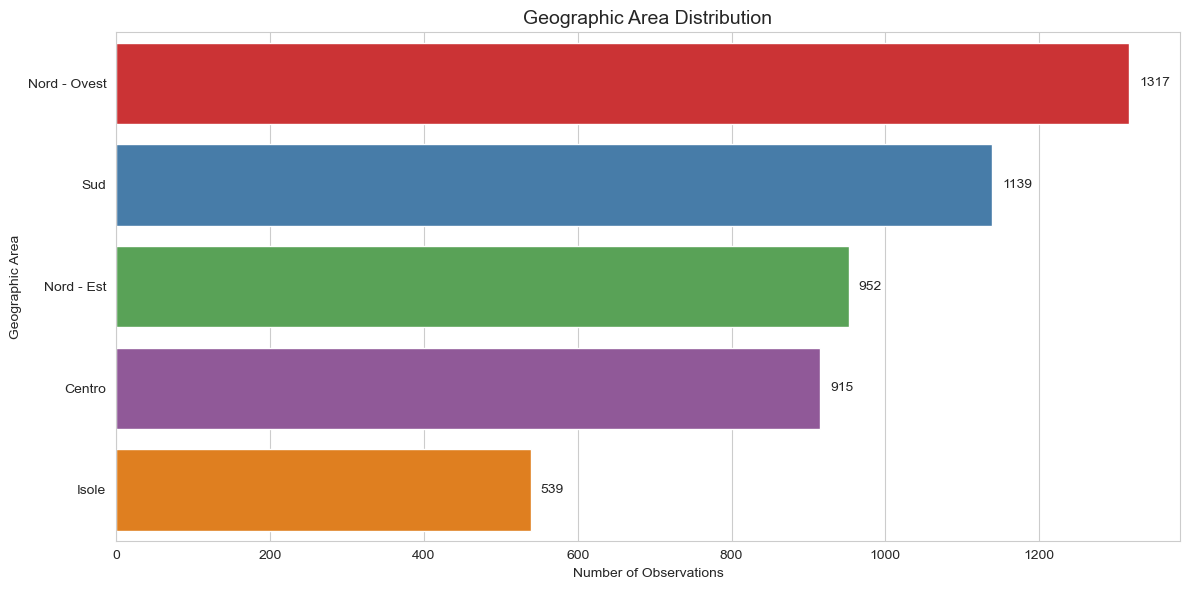

In [31]:
# geographic area distribution
ax = sns.countplot(
    data=df_viz,
    y="Geographic Area",
    order=df_viz["Geographic Area"].value_counts().index,
    palette="Set1"
)
plt.title("Geographic Area Distribution", fontsize=14)
plt.xlabel("Number of Observations")


for p in ax.patches:
    count = int(p.get_width())
    ax.text(
        p.get_width() + max(df_viz["Geographic Area"].value_counts()) * 0.01,  
        p.get_y() + p.get_height() / 2,  
        count,
        va='center',
        ha='left',
        fontsize=10
    )

plt.tight_layout()
plt.show()

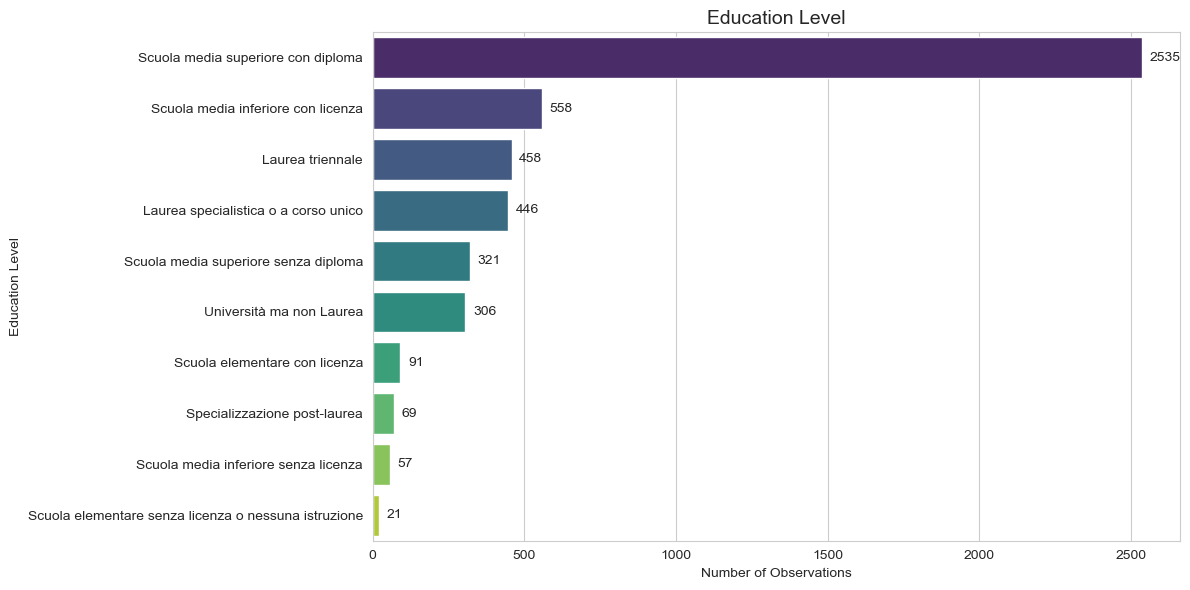

In [32]:
# education level
ax = sns.countplot(
    data=df_viz,
    y="Education Level",
    order=df_viz["Education Level"].value_counts().index,
    palette="viridis"
)

plt.title("Education Level", fontsize=14)
plt.xlabel("Number of Observations")
plt.yticks(fontsize=10)


for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + max(df_viz["Education Level"].value_counts()) * 0.01,
            p.get_y() + p.get_height() / 2,
            count,
            va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


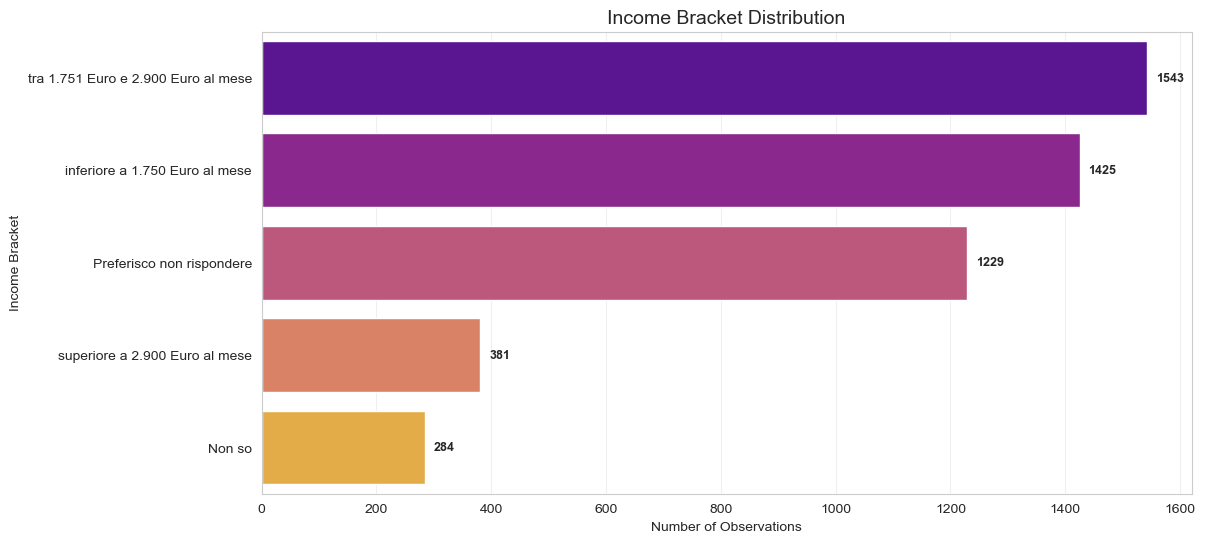

In [33]:
income_counts = df_viz["Income Bracket"].value_counts()


ax = sns.countplot(
    data=df_viz,
    y="Income Bracket",
    order=income_counts.index,
    palette="plasma"
)
plt.title("Income Bracket Distribution", fontsize=14)
plt.xlabel("Number of Observations")
plt.ylabel("Income Bracket")

# Add value labels
for i, category in enumerate(income_counts.index):
    count = income_counts[category]
    ax.text(count + max(income_counts) * 0.01, i, str(count),
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.3)
plt.show()

In [34]:
# descriptive analitycs
print("=== SUMMARY STATISTICS ===")
for col in df_viz.columns:
    print(f"\n{col}:") # only numeric variable
    if col == "Age":
        print(f"  - Mean: {df_viz[col].mean():.2f}")
        print(f"  - Median: {df_viz[col].median():.2f}")
        print(f"  - Min-Max: {df_viz[col].min():.0f}-{df_viz[col].max():.0f}")
        print(f"  - Missing values: {df_viz[col].isna().sum()}")
    else:
        if df_viz[col].dropna().empty:
            most_common = 'N/A'
        else:
            most_common = df_viz[col].mode().iloc[0]

        print(f"  - Unique categories: {df_viz[col].nunique()}")
        print(f"  - Most common: {most_common}")
        print(f"  - Missing values: {df_viz[col].isna().sum()}")

=== SUMMARY STATISTICS ===

Gender:
  - Unique categories: 2
  - Most common: Donna
  - Missing values: 0

Age:
  - Mean: 50.31
  - Median: 50.00
  - Min-Max: 18-79
  - Missing values: 219

Geographic Area:
  - Unique categories: 5
  - Most common: Nord - Ovest
  - Missing values: 0

Education Level:
  - Unique categories: 10
  - Most common: Scuola media superiore con diploma
  - Missing values: 0

Income Bracket:
  - Unique categories: 5
  - Most common: tra 1.751 Euro e 2.900 Euro al mese
  - Missing values: 0


# Machine Learning

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as mpl_cm
from matplotlib.patches import Ellipse
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    r2_score,
    classification_report,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    silhouette_score,
    silhouette_samples,
    calinski_harabasz_score
)

warnings.filterwarnings('ignore')


In [36]:
# missing data
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # List of numeric columns in df
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # List of categorical columns in df

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
# handling missing data
# impute missing numeric values with the median
if len(numeric_cols) > 0:
    imputer_numeric = SimpleImputer(strategy='median')
    df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
    print("Missing numeric values imputed with the median.")

# impute missing categorical values with a constant value
if len(categorical_cols) > 0:
    imputer_categorical = SimpleImputer(strategy='constant', fill_value='Unknown')
    df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])
    print("Missing categorical values imputed with 'Unknown'.")


Numeric columns: 2
Categorical columns: 217
Missing numeric values imputed with the median.
Missing categorical values imputed with 'Unknown'.


In [37]:
print("ENCODING CATEGORICAL VARIABLES")  

print("=" * 50)

# dictionary to store the encoders
label_encoders = {}
encoded_columns = []

# encode only variables with fewer than 50 unique categories
for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values < 50:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        encoded_columns.append(col)
        print(f"Encoded {col}: {unique_values} unique categories")

print(f"\nTotal encoded columns: {len(encoded_columns)}")
print(f"Final dataset dimensions: {df.shape}")


ENCODING CATEGORICAL VARIABLES
Encoded Gender: 2 unique categories
Encoded qd7_a: 4 unique categories
Encoded Geographic_Area: 5 unique categories
Encoded Province: 5 unique categories
Encoded qd5_1: 2 unique categories
Encoded qd5_2: 2 unique categories
Encoded qd5_3: 2 unique categories
Encoded qd5_4: 2 unique categories
Encoded qd5_5: 2 unique categories
Encoded qd5_6: 2 unique categories
Encoded qd5_7: 2 unique categories
Encoded qd5_99: 2 unique categories
Encoded qd5_ad: 9 unique categories
Encoded qd5_ch: 8 unique categories
Encoded Work_Sector: 10 unique categories
Encoded Purchase_Motivation: 3 unique categories
Encoded qf1_a: 3 unique categories
Encoded qf1: 4 unique categories
Encoded qf2_1: 3 unique categories
Encoded qf2_2: 3 unique categories
Encoded qf2_3: 3 unique categories
Encoded qf2_4: 3 unique categories
Encoded qf2_5: 3 unique categories
Encoded qf2_6: 3 unique categories
Encoded qf3_1: 4 unique categories
Encoded qf3_2: 4 unique categories
Encoded qf3_3: 4 unique

In [38]:
# explicitly define the classification target
target_classification = 'Gender'

# select numeric features (excluding encoded columns that are not the target)
available_numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# exclude the target from the available numeric features
available_numeric_features = [f for f in available_numeric_features if f != target_classification]

print(f"Numeric features available for ML: {len(available_numeric_features)}")
print("First 10 numeric features:", available_numeric_features[:10])

# check for availability of classification and regression targets
classification_targets = [target_classification] if target_classification in df.columns else []
regression_targets = [col for col in numeric_cols if 'Age' in col]

print(f"\nAvailable classification target(s): {classification_targets}")
print(f"Available regression target(s): {regression_targets}")



Numeric features available for ML: 217
First 10 numeric features: ['Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1', 'qd5_2', 'qd5_3', 'qd5_4', 'qd5_5', 'qd5_6']

Available classification target(s): ['Gender']
Available regression target(s): ['Age']


In [39]:
selected_numeric_features = available_numeric_features

if len(classification_targets) > 0 and len(selected_numeric_features) >= 3:
    
    print("CLASSIFICATION TASK: PREDICTING GENDER")
    print("=" * 50)
    
    # Select target and features
    target_classification = classification_targets[0]  # Take the first available target
    X_classification = df[selected_numeric_features]
    y_classification = df[target_classification]
    
    # Remove rows with missing target values
    mask = ~y_classification.isnull()
    X_classification = X_classification[mask]
    y_classification = y_classification[mask]
    
    print(f"Selected target: {target_classification}")
    print(f"Number of samples: {len(X_classification)}")
    print("Class distribution:")
    print(y_classification.value_counts())
    
    # feature selection using ANOVA F-test

    k_features_class = len(selected_numeric_features)
    selector_class = SelectKBest(f_classif, k=k_features_class)
    X_selected_class = selector_class.fit_transform(X_classification, y_classification)
    selected_features_class = np.array(selected_numeric_features)[selector_class.get_support()]
    
    print(f"\nFeature selection completed: {len(selected_features_class)} features selected")
    print("Top 5 selected features:", selected_features_class[:5].tolist())

else:
    print("CLASSIFICATION NOT POSSIBLE - Insufficient target or features")
    X_selected_class = None


CLASSIFICATION TASK: PREDICTING GENDER
Selected target: Gender
Number of samples: 4862
Class distribution:
Gender
0    2446
1    2416
Name: count, dtype: int64

Feature selection completed: 217 features selected
Top 5 selected features: ['Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1']


In [40]:
# CLASSIFICATION - TRAIN/TEST SPLIT AND SCALING
# ============================================================================

if X_selected_class is not None:
    
    # Train/test split
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
        X_selected_class, y_classification, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_classification
    )
    
    # Data scaling
    scaler_class = StandardScaler()
    X_train_class_scaled = scaler_class.fit_transform(X_train_class)
    X_test_class_scaled = scaler_class.transform(X_test_class)
    
    print(f"Train set shape: {X_train_class.shape}")
    print(f"Test set shape: {X_test_class.shape}")
 

Train set shape: (3889, 217)
Test set shape: (973, 217)


In [41]:
# CLASSIFICATION - MODEL TRAINING
# ============================================================================

if X_selected_class is not None:
    
    print("CLASSIFICATION MODEL TRAINING")
    print("=" * 50)
    
    # Define models
    classification_models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(random_state=42, probability=True),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }
    
    # Training and evaluation
    classification_results = {}
    
    for model_name, model in classification_models.items():
        try:
            # Tree-based models use unscaled data
            if model_name in ['Random Forest', 'Gradient Boosting']:
                model.fit(X_train_class, y_train_class)
                y_pred_class = model.predict(X_test_class)
                # Cross-validation
                cv_scores_class = cross_val_score(model, X_train_class, y_train_class, cv=5)
                
            else:
                model.fit(X_train_class_scaled, y_train_class)
                y_pred_class = model.predict(X_test_class_scaled)
                # Cross-validation
                cv_scores_class = cross_val_score(model, X_train_class_scaled, y_train_class, cv=5)
            
            # Compute metrics
            accuracy = accuracy_score(y_test_class, y_pred_class)
            cv_mean = cv_scores_class.mean()
            cv_std = cv_scores_class.std()
            
            classification_results[model_name] = {
                'accuracy': accuracy,
                'cv_mean': cv_mean,
                'cv_std': cv_std,
                'model': model
            }
            
            print(f"{model_name:25}: Accuracy = {accuracy:.4f}, CV = {cv_mean:.4f} ± {cv_std*2:.4f}")
            
        except Exception as e:
            print(f"{model_name:25}: Error during training - {str(e)[:50]}")
    
    # Identify the best model
    if classification_results:
        best_classifier = max(classification_results.items(), key=lambda x: x[1]['accuracy'])
        print(f"\nBEST MODEL: {best_classifier[0]} with accuracy = {best_classifier[1]['accuracy']:.4f}")


CLASSIFICATION MODEL TRAINING
Random Forest            : Accuracy = 0.7544, CV = 0.7457 ± 0.0370
Logistic Regression      : Accuracy = 0.6639, CV = 0.6457 ± 0.0389
Gradient Boosting        : Accuracy = 0.9476, CV = 0.9182 ± 0.0199
SVM                      : Accuracy = 0.6763, CV = 0.6698 ± 0.0426
Naive Bayes              : Accuracy = 0.5920, CV = 0.5793 ± 0.0547
K-Nearest Neighbors      : Accuracy = 0.6166, CV = 0.6153 ± 0.0330

BEST MODEL: Gradient Boosting with accuracy = 0.9476


DETAILED CLASSIFICATION REPORT
Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       490
           1       0.95      0.95      0.95       483

    accuracy                           0.95       973
   macro avg       0.95      0.95      0.95       973
weighted avg       0.95      0.95      0.95       973


Top 10 Most Important Features:
             Feature  Importance
216             wght    0.594609
0                Age    0.194910
14       Work_Sector    0.090240
213  Education_Level    0.022581
41             qf9_7    0.016835
46            qf9_12    0.014219
158              qk1    0.012987
17               qf1    0.006739
163            qk7_2    0.003886
203            qs5_4    0.003346


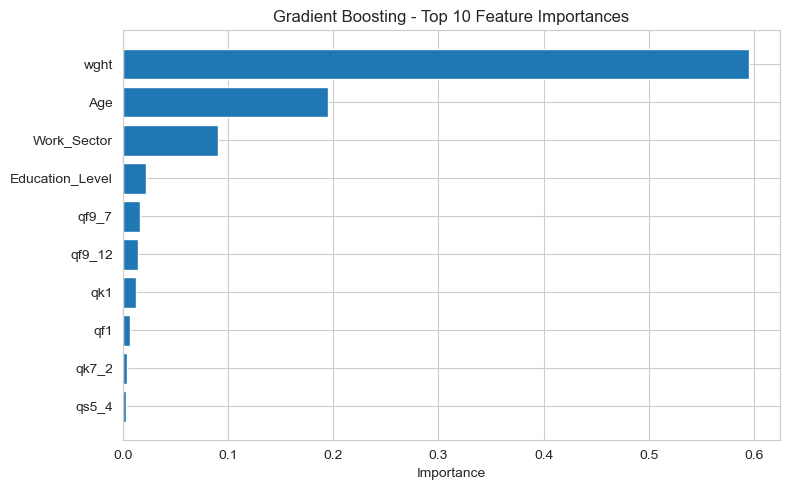

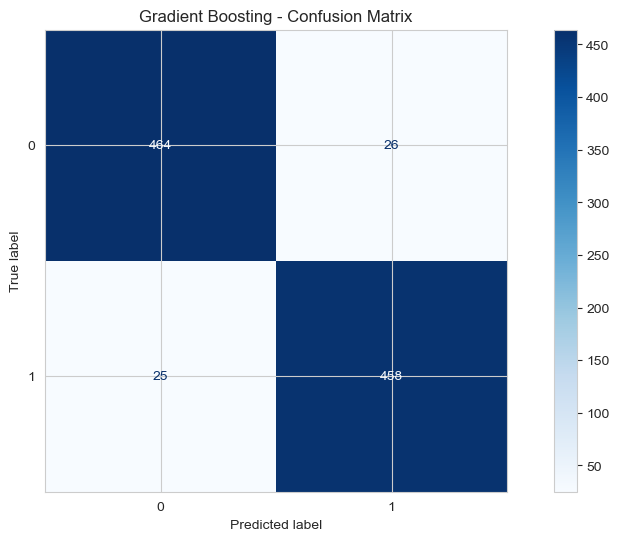

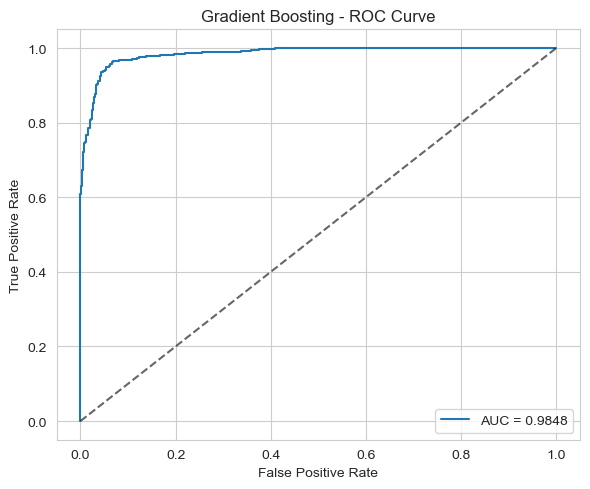

In [42]:
# CLASSIFICATION - REPORTING
if X_selected_class is not None and classification_results:
    
    print("DETAILED CLASSIFICATION REPORT")
    print("=" * 50)
    
    # best model
    best_model_name = best_classifier[0]
    best_model = best_classifier[1]['model']
    
    # test input selection based on model type
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        X_test_input = X_test_class
    else:
        X_test_input = X_test_class_scaled
    
    # predictions
    y_pred_best = best_model.predict(X_test_input)
    y_proba_best = None
    if hasattr(best_model, "predict_proba"):
        y_proba_best = best_model.predict_proba(X_test_input)[:, 1]
    
    # classification report
    print(f"Classification Report - {best_model_name}:")
    print(classification_report(y_test_class, y_pred_best))
    
    # feature importance (tree-based models only)
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        feature_importance = pd.DataFrame({
            'Feature': selected_features_class,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10))
        
        # plot feature importance
        plt.figure(figsize=(8, 5))
        plt.barh(feature_importance['Feature'].head(10)[::-1], feature_importance['Importance'].head(10)[::-1])
        plt.xlabel("Importance")
        plt.title(f"{best_model_name} - Top 10 Feature Importances")
        plt.tight_layout()
        plt.show()
    
    # confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_best)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{best_model_name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve
    if y_proba_best is not None and len(np.unique(y_test_class)) == 2:
        fpr, tpr, thresholds = roc_curve(y_test_class, y_proba_best)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{best_model_name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


CLUSTERING ANALYSIS
Total numerical features available for clustering: 218
First 10 selected features: ['Gender', 'Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1', 'qd5_2', 'qd5_3', 'qd5_4', 'qd5_5']
Samples used for clustering: 4862

Clustering completed with 3 clusters
Variance explained by PCA (2 components): 0.190

Sample distribution per cluster:
Cluster 0: 1794 samples (36.9%)
Cluster 1: 2541 samples (52.3%)
Cluster 2: 527 samples (10.8%)


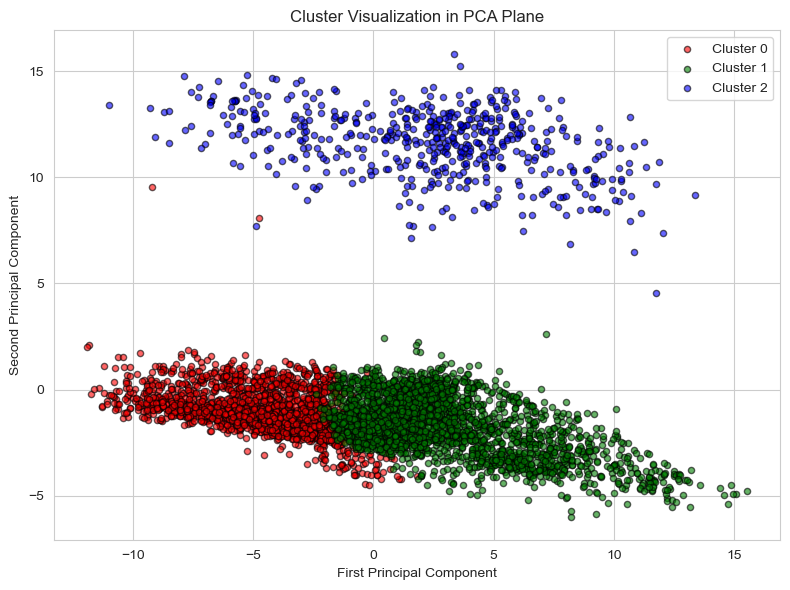

In [43]:
# CLUSTERING
######################################à

print("CLUSTERING ANALYSIS")
print("=" * 50)

# celect numerical features
clustering_features_all = [col for col in df.select_dtypes(include=[np.number]).columns]

print(f"Total numerical features available for clustering: {len(clustering_features_all)}")

# use only the first 10
clustering_features = clustering_features_all
print("First 10 selected features:", clustering_features[:10])

if len(clustering_features) >= 3:
    
    # select data without missing values in the selected columns
    X_clustering = df[clustering_features].dropna()
    
    if len(X_clustering) >= 100:
        
        print(f"Samples used for clustering: {len(X_clustering)}")
        
        # scaling for clustering
        scaler_clustering = StandardScaler()
        X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)
        
        # K-means clustering
        n_clusters = 3
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_clustering_scaled)
        
        # PCA for dimensionality reduction - usefull also for visualizations
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_clustering_scaled)
        
        print(f"\nClustering completed with {n_clusters} clusters")
        print(f"Variance explained by PCA (2 components): {pca.explained_variance_ratio_.sum():.3f}")
        
        # cluster distribution
        cluster_distribution = pd.Series(cluster_labels).value_counts().sort_index()
        print("\nSample distribution per cluster:")
        for cluster_id, count in cluster_distribution.items():
            percentage = (count / len(cluster_labels)) * 100
            print(f"Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")
        
        # save clustering results
        clustering_results = {
            'labels': cluster_labels,
            'pca_coordinates': X_pca,
            'kmeans_model': kmeans,
            'pca_model': pca,
            'explained_variance_ratio': pca.explained_variance_ratio_
        }
        
    else:
        print("Not enough samples for reliable clustering")
        clustering_results = None

else:
    print("Not enough features for clustering")
    clustering_results = None

# plot PCA visualization of clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(n_clusters):
    plt.scatter(
        X_pca[cluster_labels == cluster_id, 0],
        X_pca[cluster_labels == cluster_id, 1],
        s=20,
        c=colors[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.6,
        edgecolor='k'
    )

plt.title('Cluster Visualization in PCA Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CLUSTERING EVALUATION
Total numerical features available for clustering: 218
First 10 selected features: ['Gender', 'Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1', 'qd5_2', 'qd5_3', 'qd5_4', 'qd5_5']
Samples for clustering: 4862

Average silhouette score for 3 clusters: 0.0788


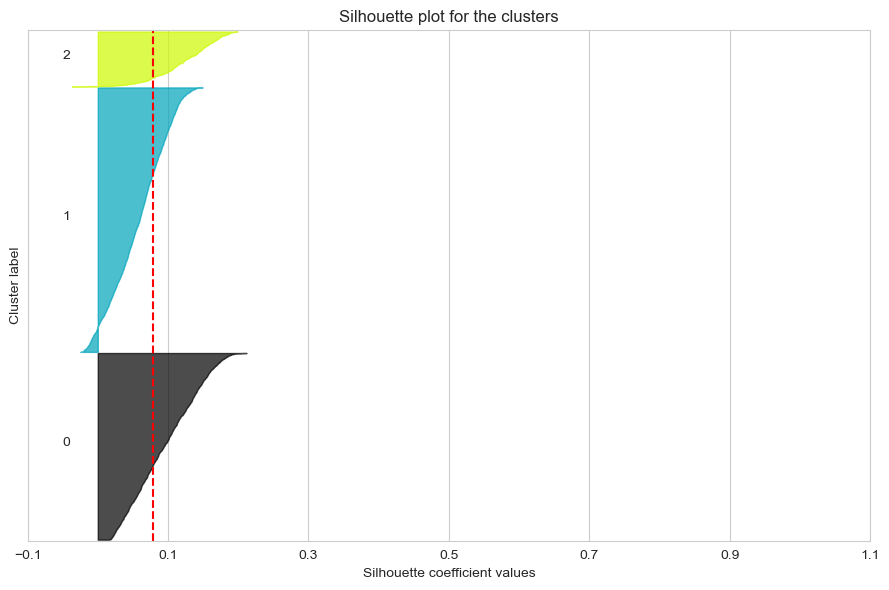

In [44]:
# clustering evaluation - k-means
##############################################

print("CLUSTERING EVALUATION")
print("=" * 50)


clustering_features_all = [col for col in df.select_dtypes(include=[np.number]).columns]

print(f"Total numerical features available for clustering: {len(clustering_features_all)}")

# all features
clustering_features = clustering_features_all
print("First 10 selected features:", clustering_features[:10])

if len(clustering_features) >= 3:
    

    X_clustering = df[clustering_features].dropna()
    
    if len(X_clustering) >= 100:
        
        print(f"Samples for clustering: {len(X_clustering)}")
        
        # ccaling per clustering
        scaler_clustering = StandardScaler()
        X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)
        
        # K-means clustering
        n_clusters = 3
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_clustering_scaled)
        
       
        silhouette_avg = silhouette_score(X_clustering_scaled, cluster_labels)
        print(f"\nAverage silhouette score for {n_clusters} clusters: {silhouette_avg:.4f}")
        

        sample_silhouette_values = silhouette_samples(X_clustering_scaled, cluster_labels)
        
        # plot Silhouette
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(9, 6)
        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_clustering_scaled) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
  
            color = mpl_cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10  # 10 for spacing between clusters
        
        ax1.set_title("Silhouette plot for the clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        ax1.set_yticks([])  # clear yaxis labels / ticks
        ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
        
        plt.tight_layout()
        plt.show()
        
  
        clustering_results = {
            'labels': cluster_labels,
            'kmeans_model': kmeans,
            'silhouette_score': silhouette_avg
        }
        
    else:
        print("Not enough samples for reliable clustering")
        clustering_results = None

else:
    print("Not enough features for clustering")
    clustering_results = None

CLUSTERING ANALYSIS WITH 2 CENTROIDS
Total numerical features available for clustering: 218
First 10 selected features: ['Gender', 'Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1', 'qd5_2', 'qd5_3', 'qd5_4', 'qd5_5']
Samples used for clustering: 4862

Clustering completed with 2 clusters
Variance explained by PCA (2 components): 0.190

Sample distribution per cluster:
Cluster 0: 4333 samples (89.1%)
Cluster 1: 529 samples (10.9%)


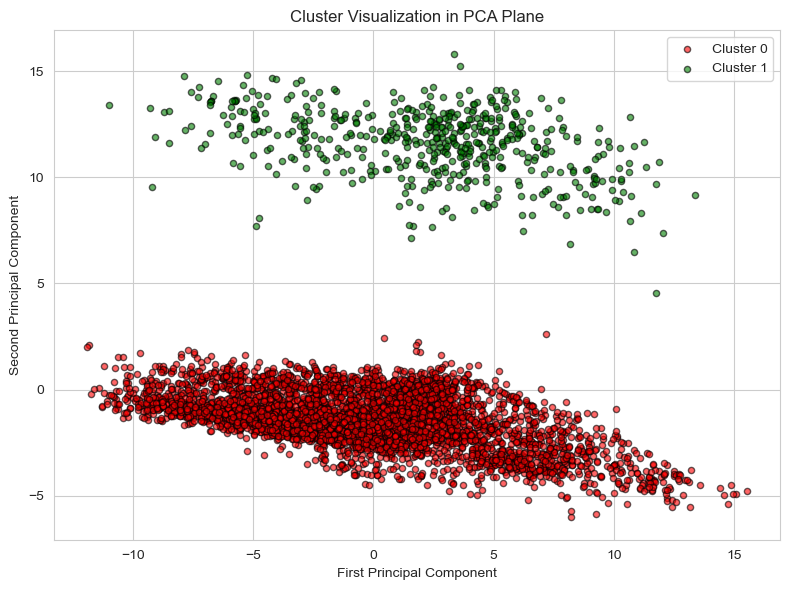

In [45]:
# 2 cluster
print("CLUSTERING ANALYSIS WITH 2 CENTROIDS")
print("=" * 50)

# Select numerical features
clustering_features_all = [col for col in df.select_dtypes(include=[np.number]).columns]

print(f"Total numerical features available for clustering: {len(clustering_features_all)}")

# Use only the first 10
clustering_features = clustering_features_all
print("First 10 selected features:", clustering_features[:10])

if len(clustering_features) >= 3:
    
    # Select data without missing values in the selected columns
    X_clustering = df[clustering_features].dropna()
    
    if len(X_clustering) >= 100:
        
        print(f"Samples used for clustering: {len(X_clustering)}")
        
        # Scaling for clustering
        scaler_clustering = StandardScaler()
        X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)
        
        # K-means clustering
        n_clusters = 2
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_clustering_scaled)
        
        # PCA for dimensionality reduction (for visualization)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_clustering_scaled)
        
        print(f"\nClustering completed with {n_clusters} clusters")
        print(f"Variance explained by PCA (2 components): {pca.explained_variance_ratio_.sum():.3f}")
        
        # Cluster distribution
        cluster_distribution = pd.Series(cluster_labels).value_counts().sort_index()
        print("\nSample distribution per cluster:")
        for cluster_id, count in cluster_distribution.items():
            percentage = (count / len(cluster_labels)) * 100
            print(f"Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")
        
        # Save clustering results
        clustering_results = {
            'labels': cluster_labels,
            'pca_coordinates': X_pca,
            'kmeans_model': kmeans,
            'pca_model': pca,
            'explained_variance_ratio': pca.explained_variance_ratio_
        }
        
    else:
        print("Not enough samples for reliable clustering")
        clustering_results = None

else:
    print("Not enough features for clustering")
    clustering_results = None

# Plot PCA visualization of clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(n_clusters):
    plt.scatter(
        X_pca[cluster_labels == cluster_id, 0],
        X_pca[cluster_labels == cluster_id, 1],
        s=20,
        c=colors[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.6,
        edgecolor='k'
    )

plt.title('Cluster Visualization in PCA Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CLUSTERING EVALUATION
Total numerical features available for clustering: 218
First 10 selected features: ['Gender', 'Age', 'qd7_a', 'Geographic_Area', 'Province', 'qd5_1', 'qd5_2', 'qd5_3', 'qd5_4', 'qd5_5']
Samples for clustering: 4862

Average silhouette score for 2 clusters: 0.1913


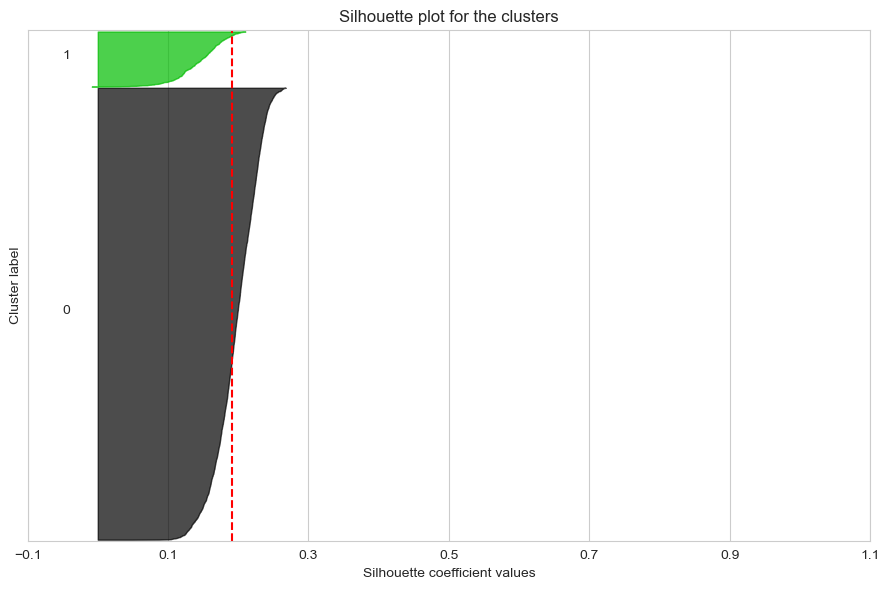

In [46]:
# 2 centroids clustering evaluation
##############################################

print("CLUSTERING EVALUATION")
print("=" * 50)


clustering_features_all = [col for col in df.select_dtypes(include=[np.number]).columns]

print(f"Total numerical features available for clustering: {len(clustering_features_all)}")


clustering_features = clustering_features_all
print("First 10 selected features:", clustering_features[:10])

if len(clustering_features) >= 3:
    

    X_clustering = df[clustering_features].dropna()
    
    if len(X_clustering) >= 100:
        
        print(f"Samples for clustering: {len(X_clustering)}")
        
        #  clustering Scaling
        scaler_clustering = StandardScaler()
        X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)
        
        # K-means clustering
        n_clusters = 2
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_clustering_scaled)
        
        # avarege silhouette score 
        silhouette_avg = silhouette_score(X_clustering_scaled, cluster_labels)
        print(f"\nAverage silhouette score for {n_clusters} clusters: {silhouette_avg:.4f}")
        
        # silhouette values per cluster
        sample_silhouette_values = silhouette_samples(X_clustering_scaled, cluster_labels)
        
        # plot Silhouette
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(9, 6)
        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_clustering_scaled) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            

            color = mpl_cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10  
        
        ax1.set_title("Silhouette plot for the clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        ax1.set_yticks([])  
        ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
        
        plt.tight_layout()
        plt.show()
        

        clustering_results = {
            'labels': cluster_labels,
            'kmeans_model': kmeans,
            'silhouette_score': silhouette_avg
        }
        
    else:
        print("Not enough samples for reliable clustering")
        clustering_results = None

else:
    print("Not enough features for clustering")
    clustering_results = None

OPTIMIZED CLUSTERING FOR ELLIPTICAL SHAPES
Available numerical features: 218
Selected the 6 features with highest variance
Features used: ['Age', 'qk4', 'qp9_7', 'qp9_6', 'qp9_10', 'qp9_5']
Samples used: 4862

1. PREPROCESSING
Outliers removed: 1012
PCA variance: 0.874

ALGORITHM TESTING
   GMM... OK (Sil: 0.330)
   DBSCAN... OK (Sil: 0.261, Noise: 1581)
   Spectral... (sampled 1000)... OK (Sil: 0.452)

RESULTS:
Algorithm  Silhouette   Calinski-H  
-----------------------------------
GMM        0.330        2352.5      
DBSCAN     0.261        1217.7      
Spectral   0.452        3558.2      

VISUALIZATION


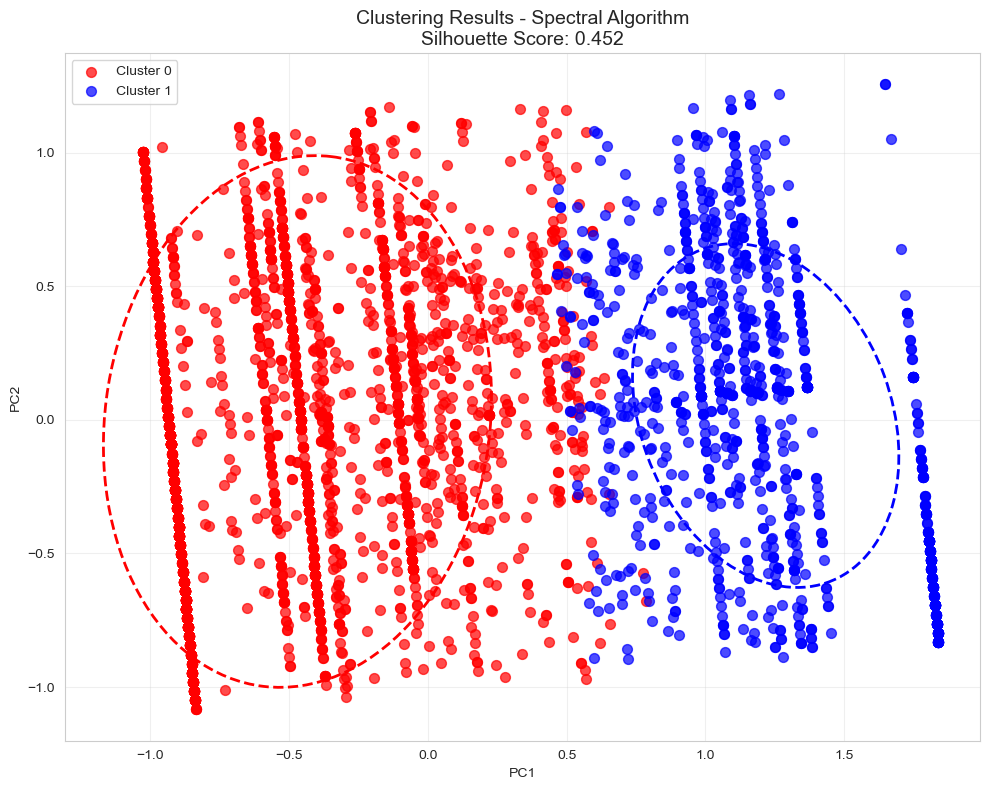

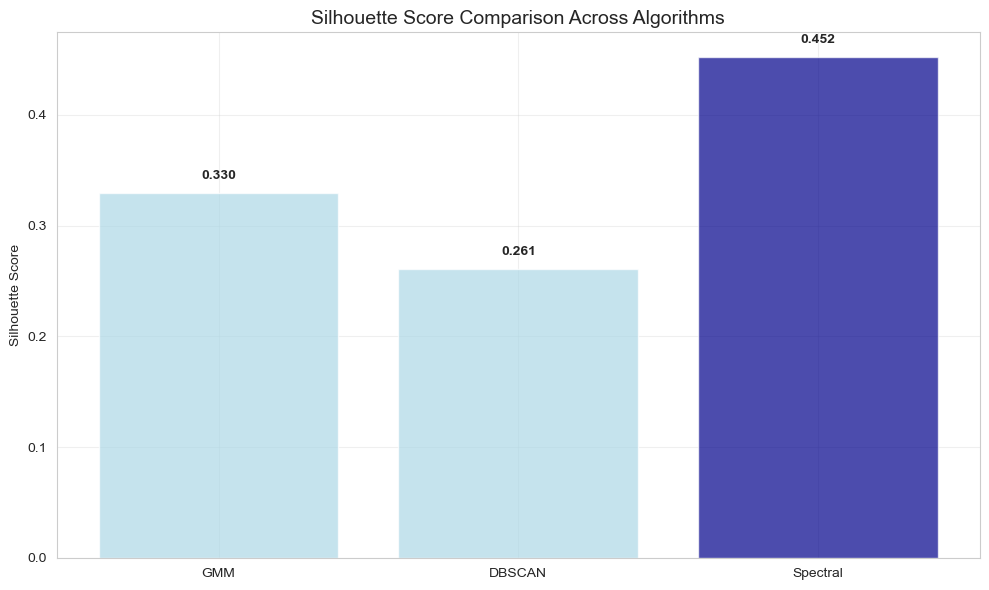

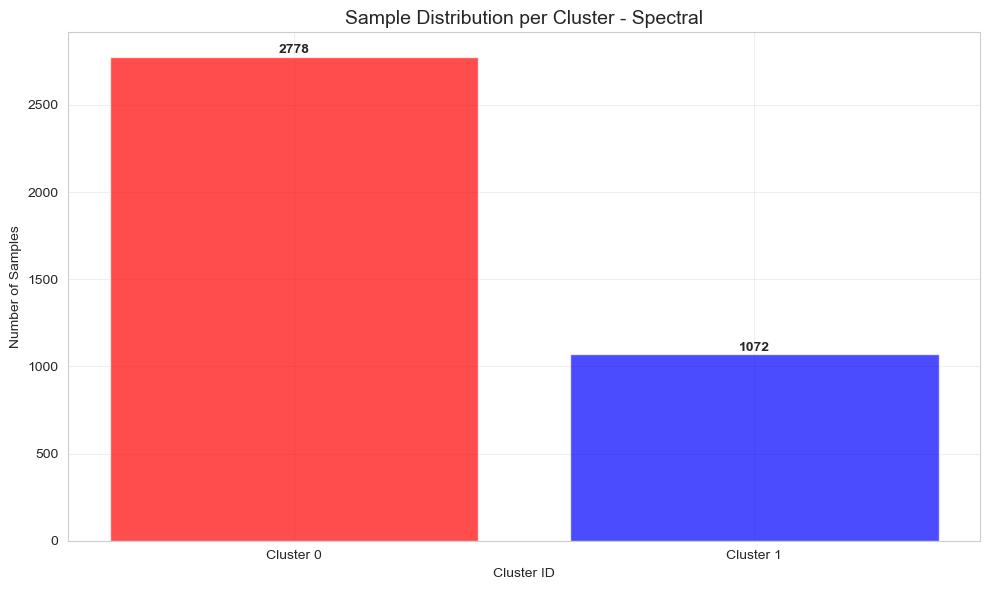

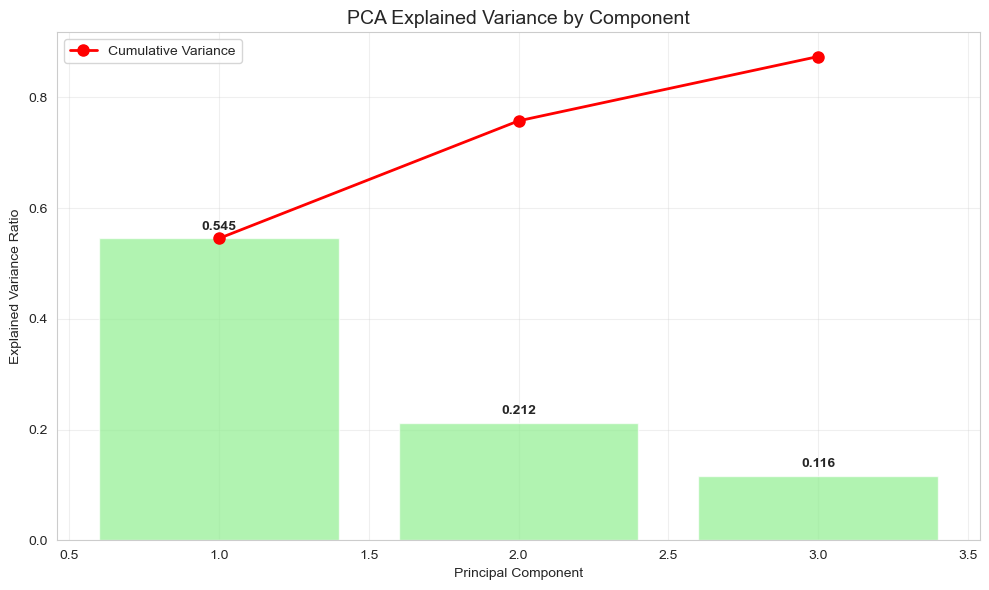


BEST ALGORITHM: Spectral
SILHOUETTE SCORE: 0.452
CLUSTERS FOUND: 2


In [47]:
# non spherical/ elliptical clustering
#################################################
print("OPTIMIZED CLUSTERING FOR ELLIPTICAL SHAPES")
print("=" * 50)


clustering_features_all = [col for col in df.select_dtypes(include=[np.number]).columns]
print(f"Available numerical features: {len(clustering_features_all)}")

# limit to max 6 features for speed
if len(clustering_features_all) > 6:
    feature_vars = df[clustering_features_all].var().sort_values(ascending=False)
    clustering_features = feature_vars.head(6).index.tolist()
    print(f"Selected the 6 features with highest variance")
else:
    clustering_features = clustering_features_all

print(f"Features used: {clustering_features}")

if len(clustering_features) >= 2:
    
    # Clean data
    X_clustering = df[clustering_features].dropna()
    
    if len(X_clustering) >= 50:
        
        print(f"Samples used: {len(X_clustering)}")
        
        # FAST PREPROCESSING
        print("\n1. PREPROCESSING")
        
        # Robust scaling
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(X_clustering)
        
        # outlier removal - IQR method
        def remove_outliers_iqr(X, factor=1.5):
            Q1 = np.percentile(X, 25, axis=0)
            Q3 = np.percentile(X, 75, axis=0)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            
            mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
            return X[mask], mask
        
        X_clean, mask_clean = remove_outliers_iqr(X_scaled)
        print(f"Outliers removed: {len(X_scaled) - len(X_clean)}")
        
        # PCA for reduced dimensionality
        pca = PCA(n_components=min(3, len(clustering_features)))
        X_pca = pca.fit_transform(X_clean)
        print(f"PCA variance: {pca.explained_variance_ratio_.sum():.3f}")
        

        print("\nALGORITHM TESTING")
        
        results = {}
        
        # 1. GAUSSIAN MIXTURE -
        print("   GMM...", end="")
        try:
            gmm = GaussianMixture(
                n_components=2, 
                covariance_type='full', 
                random_state=42,
                max_iter=100 
            )
            labels_gmm = gmm.fit_predict(X_pca)
            
            if len(np.unique(labels_gmm)) == 2:
                sil_gmm = silhouette_score(X_pca, labels_gmm)
                cal_gmm = calinski_harabasz_score(X_pca, labels_gmm)
                results['GMM'] = {
                    'labels': labels_gmm,
                    'silhouette': sil_gmm,
                    'calinski': cal_gmm,
                    'model': gmm
                }
                print(f" OK (Sil: {sil_gmm:.3f})")
            else:
                print(" FAILED")
        except Exception as e:
            print(f" ERROR: {str(e)[:50]}")
        
        # 2. DBSCAN - 
        print("   DBSCAN...", end="")
        try:
            k = min(10, len(X_clean) // 10)  
            neighbors = NearestNeighbors(n_neighbors=k)
            distances, _ = neighbors.fit(X_pca).kneighbors(X_pca)
            distances = np.sort(distances[:, k-1])
            
            eps = np.percentile(distances, 80)
            min_samples = max(3, len(X_clean) // 100)
            
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels_dbscan = dbscan.fit_predict(X_pca)
            
            n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
            if n_clusters >= 2:
                # Calculate silhouette only on non-noise points
                mask_no_noise = labels_dbscan != -1
                if np.sum(mask_no_noise) > 10:
                    sil_dbscan = silhouette_score(X_pca[mask_no_noise], labels_dbscan[mask_no_noise])
                    cal_dbscan = calinski_harabasz_score(X_pca[mask_no_noise], labels_dbscan[mask_no_noise])
                    results['DBSCAN'] = {
                        'labels': labels_dbscan,
                        'silhouette': sil_dbscan,
                        'calinski': cal_dbscan,
                        'model': dbscan,
                        'n_noise': np.sum(labels_dbscan == -1)
                    }
                    print(f" OK (Sil: {sil_dbscan:.3f}, Noise: {np.sum(labels_dbscan == -1)})")
                else:
                    print(" TOO MUCH NOISE")
            else:
                print(f" FEW CLUSTERS ({n_clusters})")
        except Exception as e:
            print(f" ERROR: {str(e)[:50]}")
        
        # 3. SPECTRAL
        print("   Spectral...", end="")
        try:
            if len(X_pca) > 1000:
                idx_sample = np.random.choice(len(X_pca), 1000, replace=False)
                X_spectral = X_pca[idx_sample]
                print(f" (sampled {len(X_spectral)})...", end="")
            else:
                X_spectral = X_pca
                idx_sample = np.arange(len(X_pca))
            
            spectral = SpectralClustering(
                n_clusters=2, 
                random_state=42,
                affinity='rbf',
                gamma=1.0,  
                n_neighbors=10
            )
            labels_spectral_sample = spectral.fit_predict(X_spectral)
            

            if len(X_spectral) < len(X_pca):
                # Use KNN to assign clusters to non-sampled points
                from sklearn.neighbors import KNeighborsClassifier
                knn = KNeighborsClassifier(n_neighbors=5)
                knn.fit(X_spectral, labels_spectral_sample)
                labels_spectral = knn.predict(X_pca)
            else:
                labels_spectral = labels_spectral_sample
            
            if len(np.unique(labels_spectral)) == 2:
                sil_spectral = silhouette_score(X_pca, labels_spectral)
                cal_spectral = calinski_harabasz_score(X_pca, labels_spectral)
                results['Spectral'] = {
                    'labels': labels_spectral,
                    'silhouette': sil_spectral,
                    'calinski': cal_spectral,
                    'model': spectral
                }
                print(f" OK (Sil: {sil_spectral:.3f})")
            else:
                print(" FAILED")
        except Exception as e:
            print(f" ERROR: {str(e)[:50]}")
        
        if  results:            
            # COMPARISON AND SELECTION
            print(f"\nRESULTS:")
            print(f"{'Algorithm':<10} {'Silhouette':<12} {'Calinski-H':<12}")
            print("-" * 35)
            
            best_name = None
            best_score = -1
            
            for name, res in results.items():
                sil = res['silhouette']
                cal = res['calinski']
                
                # Simple combined score
                combined_score = sil if sil > 0.1 else cal / 1000
                
                marker = ""
                if combined_score > best_score:
                    best_score = combined_score
                    best_name = name
                
                print(f"{name:<10} {sil:<12.3f} {cal:<12.1f}{marker}")
            
            best_result = results[best_name]
            best_labels = best_result['labels']
            
            # VISUALIZATION 
            print(f"\nVISUALIZATION")
            
            colors = ['red', 'blue', 'green', 'orange', 'purple']
            
            # PLOT 1: clustering result with ellipses
            plt.figure(figsize=(10, 8))
            unique_labels = np.unique(best_labels)
            
            for i, label in enumerate(unique_labels):
                if label == -1:  # Noise points for DBSCAN
                    mask = best_labels == label
                    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                               c='gray', alpha=0.3, s=10, marker='x', label='Noise')
                else:
                    mask = best_labels == label
                    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                               c=colors[i % len(colors)], label=f'Cluster {label}',
                               alpha=0.7, s=50)
                    
                    # Add ellipse if enough points
                    if np.sum(mask) > 5:
                        points = X_pca[mask]
                        if points.shape[1] >= 2:
                            try:
                                cov = np.cov(points.T)
                                mean = np.mean(points, axis=0)
                                eigenvals, eigenvecs = np.linalg.eigh(cov)
                                angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
                                
                                ellipse = Ellipse(mean, 4*np.sqrt(eigenvals[0]), 4*np.sqrt(eigenvals[1]),
                                                angle=angle, facecolor='none',
                                                edgecolor=colors[i % len(colors)], linewidth=2, linestyle='--')
                                plt.gca().add_patch(ellipse)
                            except:
                                pass
            
            plt.title(f'Clustering Results - {best_name} Algorithm\nSilhouette Score: {best_result["silhouette"]:.3f}', fontsize=14)
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # PLOT 2: algorithm comparison
            plt.figure(figsize=(10, 6))
            alg_names = list(results.keys())
            silhouette_scores = [results[name]['silhouette'] for name in alg_names]
            
            bars = plt.bar(alg_names, silhouette_scores, alpha=0.7, 
                          color=['lightblue' if name != best_name else 'darkblue' for name in alg_names])
            plt.title('Silhouette Score Comparison Across Algorithms', fontsize=14)
            plt.ylabel('Silhouette Score')
            plt.grid(True, alpha=0.3)
            
            for bar, score in zip(bars, silhouette_scores):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
            # PLOT 3: Cluster distribution
            plt.figure(figsize=(10, 6))
            cluster_counts = pd.Series(best_labels).value_counts().sort_index()
            
            colors_dist = ['gray' if idx == -1 else colors[idx % len(colors)] for idx in cluster_counts.index]
            bars3 = plt.bar(range(len(cluster_counts)), cluster_counts.values, 
                           color=colors_dist, alpha=0.7)
            
            plt.title(f'Sample Distribution per Cluster - {best_name}', fontsize=14)
            plt.xlabel('Cluster ID')
            plt.ylabel('Number of Samples')
            plt.xticks(range(len(cluster_counts)), 
                      [f'Cluster {idx}' if idx != -1 else 'Noise' for idx in cluster_counts.index])
            
            for bar, count in zip(bars3, cluster_counts.values):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        f'{count}', ha='center', va='bottom', fontweight='bold')
            
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # PLOT 4: PCA explained variance
            plt.figure(figsize=(10, 6))
            components = range(1, len(pca.explained_variance_ratio_) + 1)
            bars4 = plt.bar(components, pca.explained_variance_ratio_, alpha=0.7, color='lightgreen')
            plt.title('PCA Explained Variance by Component', fontsize=14)
            plt.xlabel('Principal Component')
            plt.ylabel('Explained Variance Ratio')
            
            # cumulative variance line
            plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 
                    'ro-', linewidth=2, markersize=8, label='Cumulative Variance')
            
            for bar, variance in zip(bars4, pca.explained_variance_ratio_):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{variance:.3f}', ha='center', va='bottom', fontweight='bold')
            
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # final results
            clustering_results = {
                'best_algorithm': best_name,
                'best_labels': best_labels,
                'best_model': best_result['model'],
                'all_results': results,
                'pca_model': pca,
                'scaler': scaler,
                'features_used': clustering_features,
                'silhouette_score': best_result['silhouette']
            }
            
            print(f"\n{'='*50}")
            print(f"BEST ALGORITHM: {best_name}")
            print(f"SILHOUETTE SCORE: {best_result['silhouette']:.3f}")
            print(f"CLUSTERS FOUND: {len(np.unique(best_labels))}")
            print(f"{'='*50}")
    
    else:
        print("Not enough samples")
        clustering_results = None

else:
    print("Not enough features")
    clustering_results = None